In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import random

import os
import pathlib
from pathlib import Path
from PIL import Image


In [2]:
# Set directory path
directory_path = Path("underwater_plastics")
TRAIN_IMAGES = directory_path / "train/images"
TRAIN_LABELS = directory_path / "train/labels"
VAL_IMAGES   = directory_path / "valid/images"
VAL_LABELS   = directory_path / "valid/labels"

In [3]:
labels = ['Mask', 'can', 'cellphone', 'electronics', 'gbottle', 'glove', 'metal', 'misc', 'net', 'pbag', 'pbottle', 'plastic', 'rod', 'sunglasses', 'tire']
class_names = {
    0: 'Mask',
    1: 'can',
    2: 'cellphone',
    3: 'electronics',
    4: 'gbottle',
    5: 'glove',
    6: 'metal',
    7: 'misc',
    8: 'net',
    9: 'pbag',
    10: 'pbottle',
    11: 'plastic',
    12: 'rod',
    13: 'sunglasses',
    14: 'tire'
    
}

In [4]:
# Create a function capable of visualising a couple of images randomly
def plot_images(directory_path, image_size:tuple=(224, 224), nb_img: int = 9):
    """
    Randomly lots multiple images so as to visualize the dataset we're
    working with

    Args :
        image_size = size of image to resize
        nb_img = number of images to plot
    """
    # Creates a list with all the images of cats and dogs combined
    all_images = list(directory_path.glob('train/images/*.jpg'))

    if nb_img > 9:
        print('ERROR : number of images to plot exceeded, please enter a number smaller or equal to 9')

    else :
        plt.figure(figsize=(10, 10))
        for i in range(nb_img):
            # Create list of unique image directories
            random_img = random.sample(all_images, nb_img)

            # Resize images so that they're all the same size
            img = Image.open(random_img[i])
            image_resized = img.resize(image_size)


            # Plot the images
            plt.subplot(3, 3, 1+i)
            plt.imshow(image_resized)
            plt.axis(False)



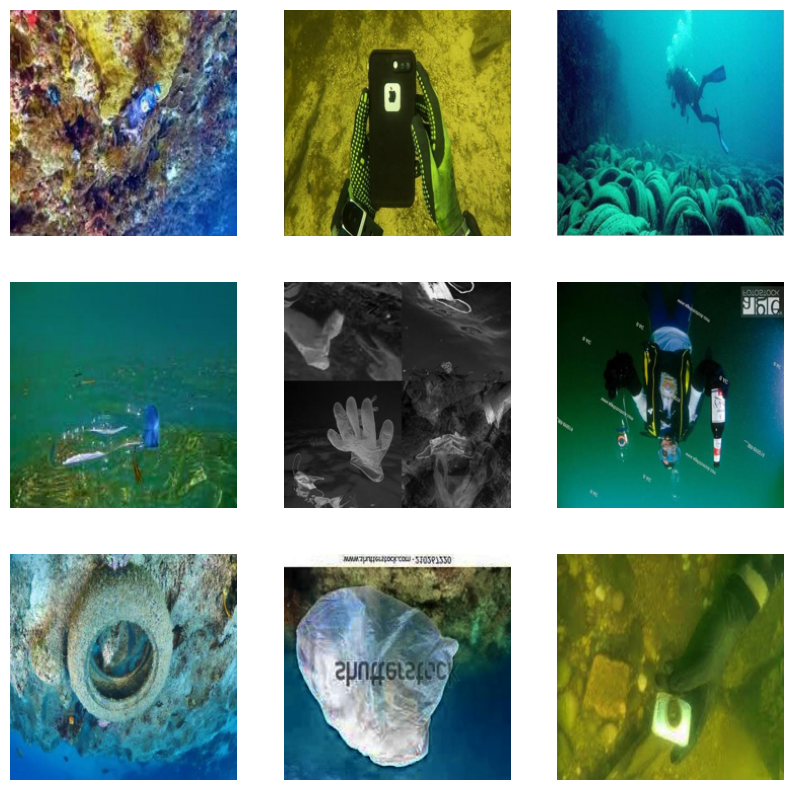

In [5]:
# Plot images
plot_images(directory_path)

In [6]:
def analyze_dataset(images_path, labels_path, set_name, class_names):

    images = list(Path(images_path).glob('*.*'))
    labels = list(Path(labels_path).glob('*.txt'))

    print(f"\n{set_name} Set:")
    print(f"  Number of images: {len(images)}")
    print(f"  Number of label files: {len(labels)}")

    # Analyze number of objects
    class_counts = {}
    obj_counts = []

    for label_path in labels:
        with open(label_path, 'r') as f:
            lines = f.readlines()
            obj_counts.append(len(lines))
            for line in lines:
                class_id = int(line.strip().split()[0])
                class_counts[class_id] = class_counts.get(class_id, 0) + 1

    print(f"  Average objects per image: {np.mean(obj_counts):.2f}")
    print(f"  Max objects per image: {max(obj_counts)}")
    print("  Class distribution:")
    for key, value in sorted(class_counts.items()):
        print(f"    Class {key} ({class_names[key]}): {value} instances")

    return {
        'num_images': len(images),
        'num_labels': len(labels),
        'class_counts': class_counts
    }


In [7]:
train_stats = analyze_dataset(TRAIN_IMAGES, TRAIN_LABELS, "train", labels)


train Set:
  Number of images: 3628
  Number of label files: 3628
  Average objects per image: 2.43
  Max objects per image: 46
  Class distribution:
    Class 0 (Mask): 1445 instances
    Class 1 (can): 124 instances
    Class 2 (cellphone): 268 instances
    Class 3 (electronics): 137 instances
    Class 4 (gbottle): 339 instances
    Class 5 (glove): 1172 instances
    Class 6 (metal): 56 instances
    Class 7 (misc): 173 instances
    Class 8 (net): 531 instances
    Class 9 (pbag): 1135 instances
    Class 10 (pbottle): 932 instances
    Class 11 (plastic): 176 instances
    Class 12 (rod): 26 instances
    Class 13 (sunglasses): 14 instances
    Class 14 (tire): 2274 instances


In [8]:
val_stats = analyze_dataset(VAL_IMAGES, VAL_LABELS, "validation", labels)


validation Set:
  Number of images: 1001
  Number of label files: 1007
  Average objects per image: 1.90
  Max objects per image: 47
  Class distribution:
    Class 0 (Mask): 92 instances
    Class 1 (can): 20 instances
    Class 2 (cellphone): 71 instances
    Class 3 (electronics): 40 instances
    Class 4 (gbottle): 82 instances
    Class 5 (glove): 57 instances
    Class 6 (metal): 22 instances
    Class 7 (misc): 51 instances
    Class 8 (net): 149 instances
    Class 9 (pbag): 331 instances
    Class 10 (pbottle): 284 instances
    Class 11 (plastic): 59 instances
    Class 12 (rod): 9 instances
    Class 13 (sunglasses): 3 instances
    Class 14 (tire): 639 instances


In [ ]:
import matplotlib.pyplot as plt

# Noms des classes
classes = [
    "Mask", "can", "cellphone", "electronics", "gbottle", "glove",
    "metal", "misc", "net", "pbag", "pbottle", "plastic",
    "rod", "sunglasses", "tire"
]

# Nombre d'instances par classe (dans le même ordre)
counts = [
    92,   # Mask
    20,   # can
    71,   # cellphone
    40,   # electronics
    82,   # gbottle
    57,   # glove
    22,   # metal
    51,   # misc
    149,  # net
    331,  # pbag
    284,  # pbottle
    59,   # plastic
    9,    # rod
    3,    # sunglasses
    639   # tire
]
colors = plt.cm.tab20(np.linspace(0, 1, len(counts)))

plt.figure(figsize=(12, 6))
plt.bar(classes, counts, color=colors)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Classes")
plt.ylabel("Nombre d'instances")
plt.title("Distribution des classes dans le jeu de validation")
plt.tight_layout()
plt.show()


NameError: name 'colors' is not defined

<Figure size 1200x600 with 0 Axes>